In [8]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()
print(spark)
column_names = ['tweetID', 'entity', 'sentiment', 'tweet_content']
training_data = spark.read.csv('hdfs://10.0.0.45:9000/data/twitter_training.csv', header=False, inferSchema=True).toDF(*column_names)
validation_data = spark.read.csv('hdfs://10.0.0.45:9000/data/twitter_validation.csv', header=False, inferSchema=True).toDF(*column_names)
training_data.show(5)
validation_data.show(5)



+-------+-----------+---------+--------------------+
|tweetID|     entity|sentiment|       tweet_content|
+-------+-----------+---------+--------------------+
|   2401|Borderlands| Positive|im getting on bor...|
|   2401|Borderlands| Positive|I am coming to th...|
|   2401|Borderlands| Positive|im getting on bor...|
|   2401|Borderlands| Positive|im coming on bord...|
|   2401|Borderlands| Positive|im getting on bor...|
+-------+-----------+---------+--------------------+
only showing top 5 rows

+-------+---------+----------+--------------------+
|tweetID|   entity| sentiment|       tweet_content|
+-------+---------+----------+--------------------+
|   3364| Facebook|Irrelevant|I mentioned on Fa...|
|    352|   Amazon|   Neutral|BBC News - Amazon...|
|   8312|Microsoft|  Negative|@Microsoft Why do...|
|   4371|    CS-GO|  Negative|CSGO matchmaking ...|
|   4433|   Google|   Neutral|Now the President...|
+-------+---------+----------+--------------------+
only showing top 5 rows



In [9]:
training_data = training_data.fillna({"tweet_content": ""})
validation_data = validation_data.fillna({"tweet_content": ""})

In [10]:
training_data.select("tweet_content").show(5)


+--------------------+
|       tweet_content|
+--------------------+
|im getting on bor...|
|I am coming to th...|
|im getting on bor...|
|im coming on bord...|
|im getting on bor...|
+--------------------+
only showing top 5 rows



In [11]:
print(training_data.columns)


['tweetID', 'entity', 'sentiment', 'tweet_content']


In [12]:
training_data.show(5)
validation_data.show(5)

+-------+-----------+---------+--------------------+
|tweetID|     entity|sentiment|       tweet_content|
+-------+-----------+---------+--------------------+
|   2401|Borderlands| Positive|im getting on bor...|
|   2401|Borderlands| Positive|I am coming to th...|
|   2401|Borderlands| Positive|im getting on bor...|
|   2401|Borderlands| Positive|im coming on bord...|
|   2401|Borderlands| Positive|im getting on bor...|
+-------+-----------+---------+--------------------+
only showing top 5 rows

+-------+---------+----------+--------------------+
|tweetID|   entity| sentiment|       tweet_content|
+-------+---------+----------+--------------------+
|   3364| Facebook|Irrelevant|I mentioned on Fa...|
|    352|   Amazon|   Neutral|BBC News - Amazon...|
|   8312|Microsoft|  Negative|@Microsoft Why do...|
|   4371|    CS-GO|  Negative|CSGO matchmaking ...|
|   4433|   Google|   Neutral|Now the President...|
+-------+---------+----------+--------------------+
only showing top 5 rows



In [98]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()
column_names = ['tweetID', 'entity', 'sentiment', 'tweet_content']
training_data = spark.read.csv('C:\\Users\\raaya\\OneDrive\\Desktop\\Big Data\\twitter_training.csv', header=False, inferSchema=True).toDF(*column_names)
validation_data = spark.read.csv('C:\\Users\\raaya\\OneDrive\\Desktop\\Big Data\\twitter_validation.csv', header=False, inferSchema=True).toDF(*column_names)
training_data.show(5)
validation_data.show(5)

+-------+-----------+---------+--------------------+
|tweetID|     entity|sentiment|       tweet_content|
+-------+-----------+---------+--------------------+
|   2401|Borderlands| Positive|im getting on bor...|
|   2401|Borderlands| Positive|I am coming to th...|
|   2401|Borderlands| Positive|im getting on bor...|
|   2401|Borderlands| Positive|im coming on bord...|
|   2401|Borderlands| Positive|im getting on bor...|
+-------+-----------+---------+--------------------+
only showing top 5 rows

+-------+---------+----------+--------------------+
|tweetID|   entity| sentiment|       tweet_content|
+-------+---------+----------+--------------------+
|   3364| Facebook|Irrelevant|I mentioned on Fa...|
|    352|   Amazon|   Neutral|BBC News - Amazon...|
|   8312|Microsoft|  Negative|@Microsoft Why do...|
|   4371|    CS-GO|  Negative|CSGO matchmaking ...|
|   4433|   Google|   Neutral|Now the President...|
+-------+---------+----------+--------------------+
only showing top 5 rows



In [13]:
training_data = training_data.fillna({"tweet_content": ""})
validation_data = validation_data.fillna({"tweet_content": ""})


In [14]:
print(training_data.columns)  # Verify column names


['tweetID', 'entity', 'sentiment', 'tweet_content']


In [16]:
from pyspark.ml.feature import Tokenizer
tokenizer = Tokenizer(inputCol="tweet_content", outputCol="words")
try:
    training_data = tokenizer.transform(training_data)
    training_data.show(5)
except Exception as e:
    print(f"Error during tokenization: {e}")


+-------+-----------+---------+--------------------+--------------------+
|tweetID|     entity|sentiment|       tweet_content|               words|
+-------+-----------+---------+--------------------+--------------------+
|   2401|Borderlands| Positive|im getting on bor...|[im, getting, on,...|
|   2401|Borderlands| Positive|I am coming to th...|[i, am, coming, t...|
|   2401|Borderlands| Positive|im getting on bor...|[im, getting, on,...|
|   2401|Borderlands| Positive|im coming on bord...|[im, coming, on, ...|
|   2401|Borderlands| Positive|im getting on bor...|[im, getting, on,...|
+-------+-----------+---------+--------------------+--------------------+
only showing top 5 rows



In [17]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer
from pyspark.sql.functions import col, regexp_replace

training_data = training_data.drop("words", "filtered_words", "features")
validation_data = validation_data.drop("words", "filtered_words", "features")
training_data = training_data.fillna({"tweet_content": ""})
validation_data = validation_data.fillna({"tweet_content": ""})

training_data = training_data.withColumn("tweet_content", regexp_replace(col("tweet_content"), "[^\\x00-\\x7F]", ""))
validation_data = validation_data.withColumn("tweet_content", regexp_replace(col("tweet_content"), "[^\\x00-\\x7F]", ""))

tokenizer = Tokenizer(inputCol="tweet_content", outputCol="words")
training_data = tokenizer.transform(training_data)
validation_data = tokenizer.transform(validation_data)

training_data.select("words").show(5)
validation_data.select("words").show(5)


+--------------------+
|               words|
+--------------------+
|[im, getting, on,...|
|[i, am, coming, t...|
|[im, getting, on,...|
|[im, coming, on, ...|
|[im, getting, on,...|
+--------------------+
only showing top 5 rows

+--------------------+
|               words|
+--------------------+
|[i, mentioned, on...|
|[bbc, news, -, am...|
|[@microsoft, why,...|
|[csgo, matchmakin...|
|[now, the, presid...|
+--------------------+
only showing top 5 rows



In [18]:
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
training_data = remover.transform(training_data)
validation_data = remover.transform(validation_data)

cv = CountVectorizer(inputCol="filtered_words", outputCol="features")
cv_model = cv.fit(training_data)
training_data = cv_model.transform(training_data)
validation_data = cv_model.transform(validation_data)

In [19]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="sentiment", outputCol="label")
indexer_model = indexer.fit(training_data)
training_data = indexer_model.transform(training_data)
validation_data = indexer_model.transform(validation_data)

lr = LogisticRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(training_data)


In [20]:
training_data = training_data.fillna({"sentiment": "UNKNOWN"})
validation_data = validation_data.fillna({"sentiment": "UNKNOWN"})


In [21]:
training_data.select("sentiment").printSchema()
validation_data.select("sentiment").printSchema()


root
 |-- sentiment: string (nullable = false)

root
 |-- sentiment: string (nullable = false)



In [22]:
training_data.filter(col("sentiment").isNull()).show(5)
validation_data.filter(col("sentiment").isNull()).show(5)


+-------+------+---------+-------------+-----+--------------+--------+-----+
|tweetID|entity|sentiment|tweet_content|words|filtered_words|features|label|
+-------+------+---------+-------------+-----+--------------+--------+-----+
+-------+------+---------+-------------+-----+--------------+--------+-----+

+-------+------+---------+-------------+-----+--------------+--------+-----+
|tweetID|entity|sentiment|tweet_content|words|filtered_words|features|label|
+-------+------+---------+-------------+-----+--------------+--------+-----+
+-------+------+---------+-------------+-----+--------------+--------+-----+



In [23]:
training_data.select("sentiment").distinct().show()
validation_data.select("sentiment").distinct().show()


+----------+
| sentiment|
+----------+
|Irrelevant|
|  Positive|
|   Neutral|
|  Negative|
+----------+

+--------------------+
|           sentiment|
+--------------------+
| a few more weeks...|
| if you are bored...|
| CS:GO or Valoran...|
| so again #RTXOn ...|
| sexy and full of...|
| ...  and free at...|
| along with the a...|
| Do help a stream...|
| FIFA21 & PUBG Mo...|
|             UNKNOWN|
|          Irrelevant|
| it's time to quit."|
|             Neutral|
|            Positive|
| UNISTALL THE GAME""|
|            Negative|
| my PS3 (and Game...|
| Call of Duty: In...|
|  @nvidia slides 4%.|
|  from 19:00 BST! 👍|
+--------------------+



In [24]:
from pyspark.sql.functions import when, col

training_data = training_data.withColumn(
    "sentiment",
    when(col("sentiment").isin(["Positive", "Negative", "Neutral"]), col("sentiment"))
    .otherwise("UNKNOWN")
)
validation_data = validation_data.withColumn(
    "sentiment",
    when(col("sentiment").isin(["Positive", "Negative", "Neutral"]), col("sentiment"))
    .otherwise("UNKNOWN")
)


In [25]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="sentiment", outputCol="sentiment_index")
indexer_model = indexer.fit(training_data)
training_data = indexer_model.transform(training_data)
validation_data = indexer_model.transform(validation_data)


In [26]:
training_data.select("sentiment").printSchema()
validation_data.select("sentiment").printSchema()

training_data = training_data.fillna({"sentiment": "UNKNOWN"})
validation_data = validation_data.fillna({"sentiment": "UNKNOWN"})

training_data.select("sentiment").distinct().show()
validation_data.select("sentiment").distinct().show()

training_data.filter(col("sentiment").isNull()).count()
validation_data.filter(col("sentiment").isNull()).count()


root
 |-- sentiment: string (nullable = false)

root
 |-- sentiment: string (nullable = false)

+---------+
|sentiment|
+---------+
|  UNKNOWN|
| Positive|
|  Neutral|
| Negative|
+---------+

+---------+
|sentiment|
+---------+
|  UNKNOWN|
|  Neutral|
| Positive|
| Negative|
+---------+



0

In [27]:
training_data.select("sentiment").filter(~col("sentiment").rlike("^[A-Za-z ]+$")).show()
training_data = training_data.withColumn("sentiment", col("sentiment").cast("string"))
training_data.filter(col("sentiment") == "UNKNOWN").show(5)

training_data = training_data.withColumn(
    "sentiment",
    when(col("sentiment").isin(["Positive", "Negative", "Neutral"]), col("sentiment"))
    .otherwise("UNKNOWN")
)

training_data = training_data.filter(col("sentiment") != "UNKNOWN")
validation_data = training_data.filter(col("sentiment") != "UNKNOWN")

+---------+
|sentiment|
+---------+
+---------+

+-------+-----------+---------+--------------------+--------------------+--------------------+--------------------+-----+---------------+
|tweetID|     entity|sentiment|       tweet_content|               words|      filtered_words|            features|label|sentiment_index|
+-------+-----------+---------+--------------------+--------------------+--------------------+--------------------+-----+---------------+
|   2418|Borderlands|  UNKNOWN|Appreciate the (s...|[appreciate, the,...|[appreciate, (son...|(70007,[0,1,64,11...|  3.0|            3.0|
|   2418|Borderlands|  UNKNOWN|Appreciate the (s...|[appreciate, the,...|[appreciate, (sou...|(70007,[0,118,644...|  3.0|            3.0|
|   2418|Borderlands|  UNKNOWN|Evaluate the (sou...|[evaluate, the, (...|[evaluate, (sound...|(70007,[0,104,118...|  3.0|            3.0|
|   2418|Borderlands|  UNKNOWN|Appreciate the (s...|[appreciate, the,...|[appreciate, (son...|(70007,[0,64,118,...|  3.0|  

In [28]:
training_data = training_data.filter(col("sentiment") != "UNKNOWN")
training_data.filter(col("sentiment") == "UNKNOWN").show(5)

validation_data = validation_data.filter(col("sentiment") != "UNKNOWN")
validation_data.filter(col("sentiment") == "UNKNOWN").show(5)



+-------+------+---------+-------------+-----+--------------+--------+-----+---------------+
|tweetID|entity|sentiment|tweet_content|words|filtered_words|features|label|sentiment_index|
+-------+------+---------+-------------+-----+--------------+--------+-----+---------------+
+-------+------+---------+-------------+-----+--------------+--------+-----+---------------+

+-------+------+---------+-------------+-----+--------------+--------+-----+---------------+
|tweetID|entity|sentiment|tweet_content|words|filtered_words|features|label|sentiment_index|
+-------+------+---------+-------------+-----+--------------+--------+-----+---------------+
+-------+------+---------+-------------+-----+--------------+--------+-----+---------------+



In [29]:
from pyspark.ml.feature import StringIndexer

if 'sentiment_index' in training_data.columns:
    training_data = training_data.drop('sentiment_index')

if 'sentiment_index' in validation_data.columns:
    validation_data = validation_data.drop('sentiment_index')

indexer = StringIndexer(inputCol="sentiment", outputCol="sentiment_index")
indexer_model = indexer.fit(training_data)

training_data = indexer_model.transform(training_data)
validation_data = indexer_model.transform(validation_data)

training_data.show(5)
validation_data.show(5)


+-------+-----------+---------+--------------------+--------------------+--------------------+--------------------+-----+---------------+
|tweetID|     entity|sentiment|       tweet_content|               words|      filtered_words|            features|label|sentiment_index|
+-------+-----------+---------+--------------------+--------------------+--------------------+--------------------+-----+---------------+
|   2401|Borderlands| Positive|im getting on bor...|[im, getting, on,...|[im, getting, bor...|(70007,[36,64,65,...|  1.0|            1.0|
|   2401|Borderlands| Positive|I am coming to th...|[i, am, coming, t...|[coming, borders,...|(70007,[286,324,1...|  1.0|            1.0|
|   2401|Borderlands| Positive|im getting on bor...|[im, getting, on,...|[im, getting, bor...|(70007,[36,64,65,...|  1.0|            1.0|
|   2401|Borderlands| Positive|im coming on bord...|[im, coming, on, ...|[im, coming, bord...|(70007,[36,64,286...|  1.0|            1.0|
|   2401|Borderlands| Positive|im 

In [30]:
predictions = lr_model.transform(validation_data)
predictions.show(5)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
try:
    accuracy = evaluator.evaluate(predictions)
    print(f"Validation Accuracy: {accuracy:.2f}")
except Exception as e:
    print(f"An error occurred: {e}")


+-------+-----------+---------+--------------------+--------------------+--------------------+--------------------+-----+---------------+--------------------+--------------------+----------+
|tweetID|     entity|sentiment|       tweet_content|               words|      filtered_words|            features|label|sentiment_index|       rawPrediction|         probability|prediction|
+-------+-----------+---------+--------------------+--------------------+--------------------+--------------------+-----+---------------+--------------------+--------------------+----------+
|   2401|Borderlands| Positive|im getting on bor...|[im, getting, on,...|[im, getting, bor...|(70007,[36,64,65,...|  1.0|            1.0|[-4.9708207432527...|[6.30931199992014...|       1.0|
|   2401|Borderlands| Positive|I am coming to th...|[i, am, coming, t...|[coming, borders,...|(70007,[286,324,1...|  1.0|            1.0|[-8.3787163658215...|[2.26871380757771...|       1.0|
|   2401|Borderlands| Positive|im getting on 

root
 |-- tweetID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = false)
 |-- tweet_content: string (nullable = false)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filtered_words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- sentiment_index: double (nullable = false)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)

+---------------+----------+
|sentiment_index|prediction|
+---------------+----------+
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|       1.0|
|            1.0|

C:\Users\raaya\AppData\Local\Temp\ipykernel_11988\1372026065.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=validation_results, x="prediction", palette="viridis")


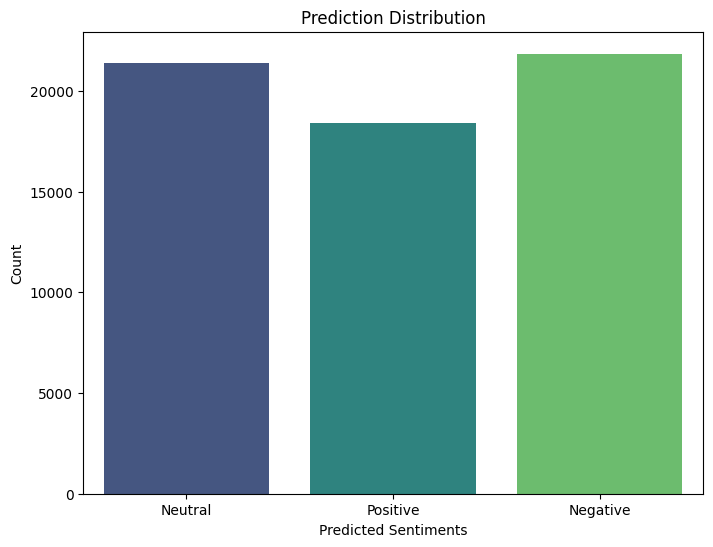

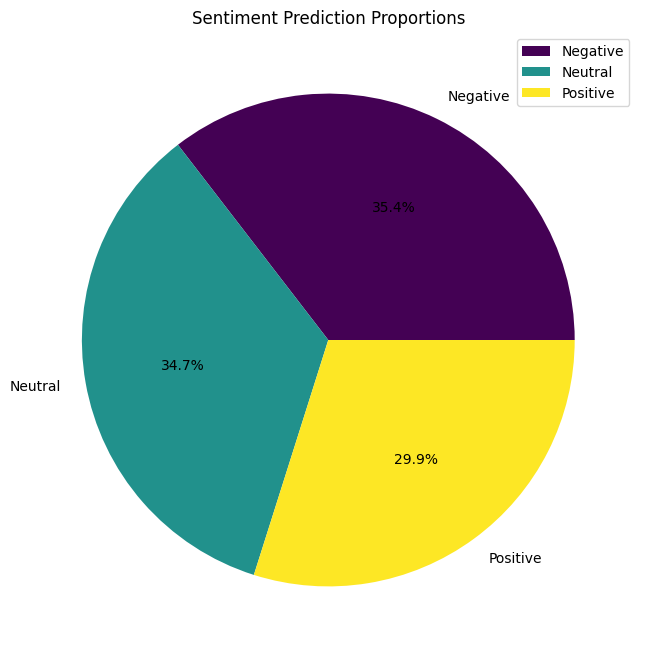

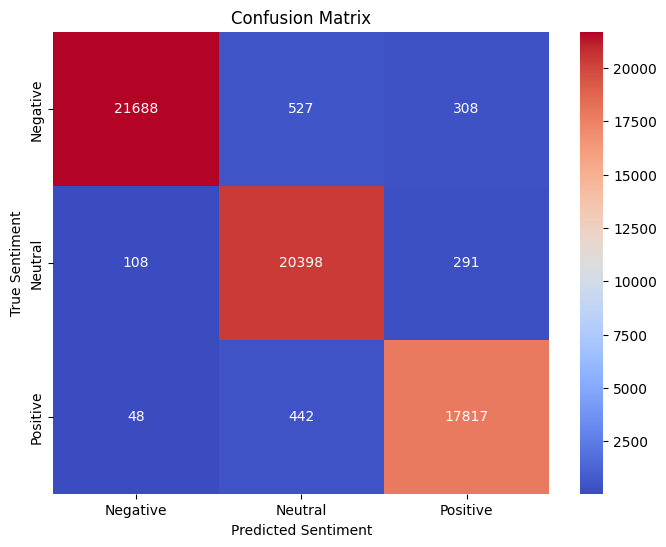

In [31]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

validation_data_with_predictions = lr_model.transform(validation_data)
validation_data_with_predictions.printSchema()

validation_data_with_predictions.select("sentiment_index", "prediction").show(50)

evaluator = MulticlassClassificationEvaluator(labelCol="sentiment_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(validation_data_with_predictions)
print(f"Validation Accuracy: {accuracy:.2f}")

validation_results = validation_data_with_predictions.select("sentiment_index", "prediction").toPandas()
# Map numeric labels to original sentiments
label_map = {0.0: "Negative", 1.0: "Neutral", 2.0: "Positive"}
validation_results["prediction"] = validation_results["prediction"].map(label_map)
validation_results["sentiment_index"] = validation_results["sentiment_index"].map(label_map)

plt.figure(figsize=(8, 6))
sns.countplot(data=validation_results, x="prediction", palette="viridis")
plt.title("Prediction Distribution")
plt.xlabel("Predicted Sentiments")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 8))
validation_results["prediction"].value_counts().plot.pie(autopct='%1.1f%%', cmap="viridis", legend=True)
plt.title("Sentiment Prediction Proportions")
plt.ylabel("")
plt.show()

confusion_matrix = pd.crosstab(validation_results["sentiment_index"], validation_results["prediction"], rownames=["True Label"], colnames=["Predicted Label"])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()
